In [2]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import os

# Label Splits
## indices from data:
1, 2, 4, 5, 9, 12
## in the featlists: 
0 = time, 1= Heart rate, 2 = Breathing rate, 3 = posture, 4 = Activity, 5 = HRconf

0 = Time
1 = HR 
2 =BR
3=SkinTemp
4=Posture
5=Activity
6=PeakAccel
7=BRAmplitude
8=BRNoise
9=BRConfidence
10=ECGAmplitude
11=ECGNoise
12=HRConfidence
13=HRV
14=GSR
15=ROGState
16=ROGTime
17=VerticalMin
18=VerticalPeak
19=LateralMin
20=LateralPeak
21=SagittalMin
22=SagittalPeak
23=AuxADC1
24=AuxADC2
25=AuxADC3

req_full = 0,1,2,4,5,6,10,11,12,13,15,16,17,18,19,20,21,22

In [3]:
def load_feat(filename):
    Data = np.genfromtxt(filename,dtype=float, delimiter=',', skip_header=1)
    return Data
def load_label(filename):
    Data = np.genfromtxt(filename,dtype="U20", delimiter=',', skip_header=1)
    return Data
trainfeat = load_feat('train_feat.csv')
trainlabel = load_label('train_label.csv')


req_full = np.array([[i[0],i[1],i[2],i[4], i[5],i[6],i[10],i[11],i[12],i[15],i[16],i[17],i[18],i[19],i[20],i[21],i[22]] for i in trainfeat])
req = [[i[0],i[1],i[2],i[4], i[5], i[12]] for i in trainfeat]
snowlabel = np.array([i[0] for i in trainlabel if i[1] == "snowboarding"])
sitlabel = np.array([i[0] for i in trainlabel if i[1] == "sitting"])
lyinglabel = np.array([i[0] for i in trainlabel if i[1] == "lying"])
liftlabel = np.array([i[0] for i in trainlabel if i[1] == "lift"])
standlabel = np.array([i[0] for i in trainlabel if i[1] == "standing"])
towlabel = np.array([i[0] for i in trainlabel if i[1] == "towlift"])





snowfeat = np.array([i for i in req if i[0] in snowlabel.astype(float)])
sitfeat = np.array([ i for i in req if i[0] in sitlabel.astype(float) ])
lyingfeat = np.array([i for i in req if i[0] in lyinglabel.astype(float)])
liftfeat = np.array([ i for i in req if i[0] in liftlabel.astype(float) ])
standfeat = np.array([i for i in req if i[0] in standlabel.astype(float)])
towfeat = np.array([i for i in req if i[0] in towlabel.astype(float)])

brsnow = max(snowfeat[:,2]), min(snowfeat[:,2])
brsit = max(np.array(sitfeat)[:,2].astype(float)), min(np.array(sitfeat)[:,2].astype(float))
brlying = max(np.array(lyingfeat)[:,2].astype(float)), min(np.array(lyingfeat)[:,2].astype(float))
brlift = max(np.array(liftfeat)[:,2].astype(float)), min(np.array(liftfeat)[:,2].astype(float))
brstand= max(np.array(standfeat)[:,2].astype(float)), min(np.array(standfeat)[:,2].astype(float))
brtow= max(np.array(towfeat)[:,2].astype(float)), min(np.array(towfeat)[:,2].astype(float))

print(brsnow, "--",
     brsit, "--",
     brlying, "--",
     brlift, "--",
     brstand, "--",
     brtow,)

actsnow = max(np.array(snowfeat)[:,4].astype(float)), min(np.array(snowfeat)[:,4].astype(float))
actsit = max(np.array(sitfeat)[:,4].astype(float)), min(np.array(sitfeat)[:,4].astype(float))
actlying =  max(np.array(lyingfeat)[:,4].astype(float)), min(np.array(lyingfeat)[:,4].astype(float))
actlift =  max(np.array(liftfeat)[:,4].astype(float)), min(np.array(liftfeat)[:,4].astype(float))
actstand = max(np.array(standfeat)[:,4].astype(float)), min(np.array(standfeat)[:,4].astype(float))
acttow = max(np.array(towfeat)[:,4].astype(float)), min(np.array(towfeat)[:,4].astype(float))

print(actsnow, "--",
     actsit, "--",
     actlying, "--",
     actlift, "--",
     actstand, "--",
     acttow)


possnow = max(np.array(snowfeat)[:,3].astype(float)), min(np.array(snowfeat)[:,3].astype(float))
possit= max(np.array(sitfeat)[:,3].astype(float)), min(np.array(sitfeat)[:,3].astype(float))
poslying = max(np.array(lyingfeat)[:,3].astype(float)), min(np.array(lyingfeat)[:,3].astype(float))
poslift = max(np.array(liftfeat)[:,3].astype(float)), min(np.array(liftfeat)[:,3].astype(float))
posstand = max(np.array(standfeat)[:,3].astype(float)), min(np.array(standfeat)[:,3].astype(float))
postow = max(np.array(towfeat)[:,3].astype(float)), min(np.array(towfeat)[:,3].astype(float))

print(possnow, "--",
     possit, "--",
     poslying, "--",
     poslift, "--",
     posstand, "--",
     postow )
# before
# (37.8, 7.5) -- (29.2, 6.3) -- (23.7, 9.6) -- (30.2, 11.8) -- (35.6, 10.6)
# (0.84, 0.01) -- (0.58, 0.01) -- (0.47, 0.01) -- (0.45, 0.01) -- (0.67, 0.0)
# (84.0, -22.0) -- (60.0, -31.0) -- (20.0, -75.0) -- (-3.0, -33.0) -- (83.0, -38.0)

print(req_full)


(37.799999999999997, 7.5) -- (29.199999999999999, 6.2999999999999998) -- (22.199999999999999, 10.6) -- (30.199999999999999, 11.800000000000001) -- (35.600000000000001, 10.6) -- (28.399999999999999, 20.600000000000001)
(1.03, 0.01) -- (0.57999999999999996, 0.01) -- (0.46999999999999997, 0.01) -- (0.45000000000000001, 0.01) -- (0.67000000000000004, 0.0) -- (0.44, 0.029999999999999999)
(84.0, -25.0) -- (60.0, -31.0) -- (20.0, -75.0) -- (-3.0, -33.0) -- (85.0, -38.0) -- (7.0, -15.0)
[[  1.35875928e+12   1.01000000e+02   1.86000000e+01 ...,   7.20000000e-01
   -5.30000000e-01   3.10000000e-01]
 [  1.35875928e+12   1.01000000e+02   1.70000000e+01 ...,   7.70000000e-01
   -7.10000000e-01  -1.00000000e-01]
 [  1.35875928e+12   1.01000000e+02   1.70000000e+01 ...,   2.40000000e-01
   -3.10000000e-01  -1.00000000e-02]
 ..., 
 [  1.35877812e+12   1.39000000e+02   2.58000000e+01 ...,   1.80000000e-01
   -6.00000000e-02   8.60000000e-01]
 [  1.35877812e+12   1.38000000e+02   2.58000000e+01 ...,   2

In [7]:
from sklearn.feature_selection import VarianceThreshold
indexlist = [0,1,2,4,5,6,10,11,12,15,16,17,18,19,20,21,22]
             
req_index = np.vstack([req_full,indexlist])
# np.append([[req_full]],[0,1,2,4,5,6,7,10,11,12,13,15,16,17,18,19,20,21,22])
# np.array([req_full,np.array([0,1,2,4,5,6,7,10,11,12,13,15,16,17,18,19,20,21,22])])
# print(req_index)
# print(req_index)

for thres in range(10):
    sel = VarianceThreshold(threshold=(thres/10))
    Y = sel.fit_transform(req_index)
    print(Y.shape)
    print(Y[-1])
    
   
# ["0 = Time",
# "1 = HR", 
# "2 =BR",
# "3=SkinTemp",
# "4=Posture",
# "5=Activity",
# "6=PeakAccel",
# "7=BRAmplitude",
# "8=BRNoise",
# "9=BRConfidence",
# "10=ECGAmplitude",
# "11=ECGNoise",
# "12=HRConfidence",
# "13=HRV",
# "14=GSR",
# "15=ROGState",
# "16=ROGTime",
# "17=VerticalMin",
# "18=VerticalPeak",
# "19=LateralMin",
# "20=LateralPeak",
# "21=SagittalMin",
# "22=SagittalPeak",
# "23=AuxADC1",
# "24=AuxADC2",
# "25=AuxADC3"]
 


(16021, 17)
[  0.   1.   2.   4.   5.   6.  10.  11.  12.  15.  16.  17.  18.  19.  20.
  21.  22.]
(16021, 10)
[  0.   1.   2.   4.  12.  15.  16.  17.  21.  22.]
(16021, 7)
[  0.   1.   2.   4.  12.  15.  16.]
(16021, 7)
[  0.   1.   2.   4.  12.  15.  16.]
(16021, 7)
[  0.   1.   2.   4.  12.  15.  16.]
(16021, 7)
[  0.   1.   2.   4.  12.  15.  16.]
(16021, 7)
[  0.   1.   2.   4.  12.  15.  16.]
(16021, 6)
[  0.   1.   2.   4.  12.  16.]
(16021, 6)
[  0.   1.   2.   4.  12.  16.]
(16021, 6)
[  0.   1.   2.   4.  12.  16.]


In [5]:

def seconds_to_minutes(data,filename):

    if os.path.exists(filename):
        os.remove(filename)
        
    # open the (csv) file
    f = open(filename, 'w+')


    for i in range(0,16020,60):

        part = data[i:i+60]
        mean = part.mean().astype(str)
        meantime = str(data[i][0])[:-2]
        # reset the line
        line = ""
        
        # create the line of values
        for value in mean:
            line += str(value) + ","
        line = line[:-1] + "\n"

        # write the line to the file
        f.write(line)
        
    # close the file
    f.close()

seconds_to_minutes(trainfeat, "minutes.csv")

## Creating the cost function [2 pt]

The cost function is defined as the sum of the squared errors of each prediction

(2.16) $$E(w_1, w_0|X) = \frac{1}{N}\sum^N_{t=1} [r^t - (w_1x^t + w_0)]^2$$

*These videos are great for building intuition on the relation between the hypothesis function and the associated cost of that hypothesis for the data.*
* [Cost function 1](https://www.youtube.com/watch?v=EANr4YttXIQ&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=6)
* [Cost function 2](https://www.youtube.com/watch?v=J5vJFwQWOaY&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=7)

Write a function to compute the cost based on the dataset $X$, $R$ and parameters $w_0$ and $w_1$. Based on your plot of the data, try to estimate some sensible values for $w_0$ and $w_1$ and compute the corresponding cost. Try at least 3 different guesses and print their cost. Order the prints of your guesses from highest to lowest cost.

In [7]:
X = [i[0] for i in load_file('points.csv')]
R = [i[1] for i in load_file('points.csv')]

def linear_cost(w0, w1, X, R):
    cost_total = 0
    for i in range(len(X)):
        cost_total += (R[i] - linear_model(w0, w1, X[i]))**2
        
    return (1/len(X)) * cost_total    

print(linear_cost(50, 60, X, R))
print(linear_cost(30, 40, X, R))
print(linear_cost(10, 20, X, R))




25524.1209718
28121.9327515
38646.1813128


## Fitting the linear model [4 pt]

We can find the minimum value of the cost function by taking the partial derivatives of that cost function for both of the weights $w_0$ and $w_1$ and setting them equal to $0$, resulting in the equations

(2.17a) $$w_1 = \frac{\sum_tx^tr^t - \bar{x}\bar{r}N}{\sum_t(x^t)^2 - N\bar{x}^2}$$
(2.17b) $$w_0 = \bar{r} - w_1\bar{x}$$

You can compute the partial derivates of equation *2.16* yourself and set them both equal to zero, to check you understand where these two equations come from. Minimizing the cost function gives us the best possible parameters for a linear model predicting the values of the provided dataset. *Note:* If you are unfamiliar with the notation $\bar{x}$, it is defined in *Alpaydin* too, below equation *2.17*.

Write a function which computes the optimal values of $w_0$ and $w_1$ for a dataset consisting of the vectors $X$ and $R$, containing $N$ elements each. Use *matplotlib* again to plot the points, but now also add the line representing the hypothesis function you found. As the line is linear, you can simply plot it by computing the 2 end points and have *matplotlib* draw the connecting line.

Note that with some clever [array operations](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) and [linear algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) you can avoid explicitly looping over all the elements in $X$ and $R$ in `linear_fit`, which will make you code a lot faster. However, this is just an optional extra and any working implementation of the equations above will be considered correct.

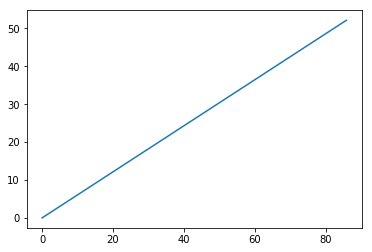

In [27]:
def linear_fit(X, R, N):
    w1 = (np.sum(np.matmul(X,R)-(np.mean(X)*np.mean(R)*N))/(np.sum(X**2 - (N * (np.mean(X)**2)))))
    w0 = (np.mean(R) - w1*np.mean(X))
    plt.plot([0,w0],[0,w1])
    
linear_fit(np.array(X), np.array(R), len(X))

## Polynomial data [3 pt]

The linear model can easily be extended to polynomials of any order by expanding the original input with the squared input $x^2$, the cubed input $x^3$, etc and adding additional weights to the model. For ease of calculation, the input is also expanded with a vector of $1$'s, to represent the input for the constant parameter $w_0$. The parameters then become $w_0$, $w_1$, $w_2$, etc., one factor for each term of the polynomial.

So if originally the dataset of $N$ elements is of the form $X$ (superscripts are indices here)

$$ X = \left[\begin{array}{c} x^1 \\ x^2 \\ \vdots \\ x^N \end{array} \right]$$

Then the matrix $D$ for a $k^{th}$-order polynomial becomes

$$ D = \left[\begin{array}{cccc}
1 & x^1 & (x^1)^2 & \cdots & (x^1)^k \\ 
1 & x^2 & (x^2)^2 & \cdots & (x^2)^k \\ 
\vdots \\
1 & x^N & (x^N)^2 & \cdots & (x^N)^k \\ 
\end{array} \right]$$

Write a function `create_D_matrix` that constructs this matrix for a given vector $X$ up the specified order $k$. Looking at plots for the dataset we have been using so far, the relationship between the points will probably be at least be quadratic. Use the function to construct a matrix $D$ of order $2$, print the matrix and verify that it looks correct.

In [53]:
def create_D_matrix(X, k):
    D_mat = [[X[i]**j for j in range(k)] for i in range(len(X)) ]  
    return np.array(D_mat)
D = create_D_matrix([3,2,3],2)
print(D)

[[1 3]
 [1 2]
 [1 3]]


## Polynomial model [2 pt]

The parameters can now be represented as

$$ w = \left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_k \end{array} \right]$$

The hypothesis for a single input then just becomes

$$ g(x^1) = \sum_{i=0}^k D^1_iw_i $$

Which can write as a matrix multiplication for all inputs in a single equation

$$ \left[\begin{array}{cccc}
1 & x^1 & (x^1)^2 & \cdots & (x^1)^k \\ 
1 & x^2 & (x^2)^2 & \cdots & (x^2)^k \\ 
\vdots \\
1 & x^N & (x^N)^2 & \cdots & (x^N)^k \\ 
\end{array} \right]
\left[\begin{array}{c} w_0 \\ w_1 \\ \vdots \\ w_k \end{array} \right] = \left[\begin{array}{c} g(x^1) \\ g(x^2) \\ \vdots \\ g(x^N) \end{array} \right]$$

You can do matrix multiplication using the [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function. Write 2 functions for computing the polynomial below

* `poly_val` should take a single input value $x$ and a vector of polynomial weights $W$ and compute the single hypothesis value for that input.
* `poly_model` should take a matrix $D$ and weight vector $W$ and compute the corresponding vector of hypotheses. 


In [6]:
def poly_val(x, W):
    np.dot(x,W)

def poly_model(D, W):
    np.dot(D,W)
    


## Polynomial cost function and model fitting [3 pts]

And for the cost function we can now use

$$ E(w|X) = \frac{1}{2N} \sum_{t=1}^N [r^t - D^tw]^2$$

Here, we compute the hypothesis $g(x)$ for every example using $D^tw$, take the difference with the actual output $r$ and finally square and sum each difference. Note that this is extremely similar to the mean squared error function we used for the linear case, and also that minimizing this error function is actually equivalent to maximizing the log likelihood of the parameter vector $w$ (see equations $4.31$ and $4.32$).

Now we have the cost function equation and can again take the partial derivative for each of the weights $w_0$ to $w_k$ and set their value equal to $0$. Solving the resulting system of equations will give the set of weights that minimize the cost function. The weights describing this lowest point of the cost function are the parameters which will produce the line that best fits our dataset.

Solving all partial derivate equations for each weight can actually be done with just a couple of matrix operations. Deriving the equation yourself can be a bit involved, but know that the principle is exactly the same as for the linear model computing just $w_0$ and $w_1$. The final equation for weight vector becomes

(4.33) $$ w = (D^TD)^{-1}D^Tr $$

Numpy has built in functions for [transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) and [inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html). Use them to write the code for the following functions.

* `poly_cost` should return the total cost $E$ given $w$, $D$ and $r$
* `poly_fit` should return the vector $w$ that bests fits the polynomial relationship between matrix $D$ and vector $r$

Using the quadratic matrix $D$ you constructed earlier and this `poly_fit` function, find the best fitting weights for a quadric polynomial on the data and print these weights


In [60]:
def poly_cost(W, D, R):
    1/2*np.sum(R-(D*w))**2

def poly_fit(D, R):
    return np.matmul(np.linalg.inv(np.matmul(np.transpose(D), D)),np.matmul(np.transpose(D), R)) 

poly_fit(D,[9,2,5])

array([-8.,  5.])

## Plotting polynomials [1 pt]

Now lets try and figure out what our fitted quadratic polynomial looks like. As the function is not linear, we will need more than just 2 points to actually plot the line. The easiest solution is to create a whole bunch of x-values as samples, compute the corresponding y-values and plot those. With enough samples the line will look smooth, even if it is connected with linear segments.

To create these x-values samples, we can use the function [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Then just use the `poly_val` function you wrote earlier and apply it to every x-value to compute the array of y-values. Now just plot the original datapoints as dots and the hypothesis as a line, just as for the linear plot. Don't forget to show your plot at the end.

Use these steps to fill in the `poly_plot` function below and show the polynomial function defined by the weights you found for the quadratic polynomial.

In [ ]:
def poly_plot(W, X, R):
    


## Polynomial order [1 pt]

You can now create a polynomial fit on the data for a polynomial of any order. The next question then becomes: *What order polynomial fits the data the best?*

Using the `create_D_matrix`, `poly_fit` and `poly_plot`, try to fit different order polynomials to the data. Show the plot for the order polynomial you think fits best.

Note that the cost function will most likely decrease with each added polynomial term, as there is more flexibility in the model to fit the data points exactly. However, these weights will fit those few data points very well, but might have very extreme values in between points that would not be good predictors for new inputs. Something like an order 20 polynomial might have a very well fitting shape for the existing data points, but looks like it would be strange predictor at some of the possible other points. Try to find a fit that looks visually like it would generalize well to new points.


## Cross validation [2 pt]

Another way to answer this same question is to use cross validation. With cross validation you split the data into 2 parts and use one part to fit the model (training set) and the other part to see how well the model fits the remaining data (validation set).

Write a function below to split the original dataset into 2 sets according to a given ratio. It is important to randomize your division, as simply using the first half of data for the one set and the second half for the other, might result in a strange distribution. You could use a function like [shuffle](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html) for this purpose.

Split the original dataset using a ratio of 0.6 into a training and a validation set. Then for both of these sets, use your old `split_X_R` function to split them into their $X$ and $R$ parts

In [50]:
def validation_split(data, ratio):
    np.random.shuffle(data)
    training = [data[i] for i in range(round(len(data)*ratio))]
    test = [data[i] for i in range(round(len(data)*ratio), len(data))]
    return training,test
training, test = validation_split(load_file('points.csv'), 0.6)

Xtrain,Rtrain = split_X_R(training)
Xtest,Rtest = split_X_R(test)


## Model selection [5 pt]

With this new split of the data you can just repeatedly fit different order polynomials to the training set and see which produces the lowest cost on the validation set. The set of weights with the lowests cost on the validation set generalizes the best to new data and is thus the best overal fit on the dataset.

Write the function `best_poly_fit` below. Try a large range of polynomial orders (like 1 to 50), create the $D$ matrix based on the training set for each order and fit the weights for that polynomial. Then for each of these found weights, also create the D matrix for the validation set and compute the cost using `poly_cost`. Return the set of weights with the lowest cost on the validation set.

Run this fitting function with your training and validation sets. Plot the hypothesis function and show the weights that were found. Note that rerunning your validation split code above will result in a different random distribution and thus a slightly different final fit.

In [ ]:
def best_poly_fit(train_x, train_r, val_x, val_r):
    
